In [1]:
!pip install tensorflow

In [2]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array

from keras.preprocessing.text import one_hot, Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [ ]:
!pip install Keras-Preprocessing

In [3]:
from keras_preprocessing.sequence import pad_sequences

In [12]:
#Importing Amazon Product Review dataset
product_review = pd.read_csv("Dataset/test.csv",header=None, nrows = 80000)
product_review.columns = ['Sentiment', 'ReviewTitle', 'Review']

In [13]:
#Shape of the dataset
product_review.shape

(80000, 3)

In [9]:
product_review.head(5)

,Sentiment,ReviewTitle,Review
0,1,mens ultrasheer,"This model may be ok for sedentary types, but ..."
1,4,Surprisingly delightful,This is a fast read filled with unexpected hum...
2,2,"Works, but not as advertised",I bought one of these chargers..the instructio...
3,2,Oh dear,I was excited to find a book ostensibly about ...
4,2,Incorrect disc!,"I am a big JVC fan, but I do not like this mod..."


In [14]:
# Checking for missing values
product_review.isnull().sum()

Sentiment      0
ReviewTitle    1
Review         0
dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

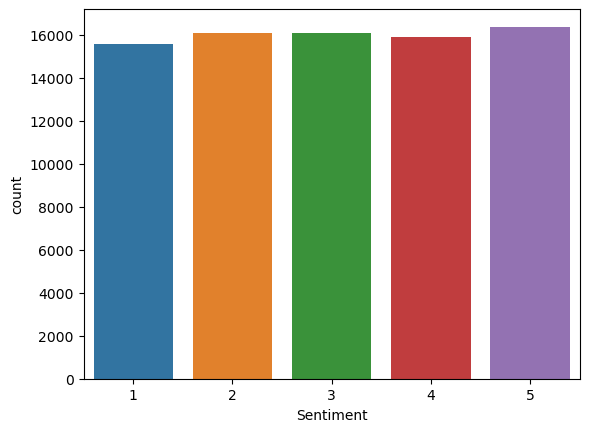

In [15]:
import seaborn as sns
sns.countplot(x='Sentiment', data=product_review)

In [16]:
# Data Preprocessing
product_review['Review'][2]

'I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thinking I had a bad unit.The new one did the same thing. I just kept it since it does charge...but the lights are useless since they seem to always stay on. It\'s a "backup" charger for when I manage to drain all my AAs but I wouldn\'t want this as my only charger.'

In [18]:
# Data preprocessing
import re
import nltk
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)
    

class CustomPreprocess():
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        sen = sen.lower()
        
        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        
        # Single character removal
        # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. 
        # Hence, we are left with single character "s" that we are removing here.
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
        
        
        # Remove multiple spaces
        # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. 
        # Finally, we remove the multiple spaces from our text as well.
        sentence = re.sub(r'\s+', ' ', sentence)
        
        
        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)
        
        return sentence

In [19]:
custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'best days life '

In [20]:
# Calling preprocessing_text function on movie_reviews

X = []
sentences = list(product_review['Review'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

In [21]:
X[2]

'bought one chargers instructions say lights stay battery charges true instructions dont say lights turn done also true hours charging lights stay returned thinking bad unit new one thing kept since charge lights useless since seem always stay backup charger manage drain aas want charger '

In [22]:
y = product_review['Sentiment']

In [ ]:
pip install scikit-learn

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

# Embedding Layer preperation

In [ ]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

In [ ]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

# Model Training with: Recurrent Neural Network (LSTM)

In [ ]:
from keras.layers import LSTM

In [ ]:
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

# New Try

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers import Embedding

In [6]:
# Load csv file
product_review = pd.read_csv('Dataset/train.csv',header=None)
product_review.columns = ['Sentiment', 'ReviewTitle', 'Review']
product_review.head()

,Sentiment,ReviewTitle,Review
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [65]:
print("Summary statistics of numerical features : \n", product_review.describe())

print("\nTotal number of reviews: ",len(product_review))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(product_review[product_review['Sentiment']==3]["Review"].count()/len(product_review)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(product_review[product_review['Sentiment']>3]["Review"].count()/len(product_review)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(product_review[product_review['Sentiment']<3]["Review"].count()/len(product_review)*100))

Summary statistics of numerical features : 
           Sentiment
count  3.000000e+06
mean   3.000000e+00
std    1.414214e+00
min    1.000000e+00
25%    2.000000e+00
50%    3.000000e+00
75%    4.000000e+00
max    5.000000e+00

Total number of reviews:  3000000

Percentage of reviews with neutral sentiment : 20.00%

Percentage of reviews with positive sentiment : 40.00%

Percentage of reviews with negative sentiment : 40.00%


Text(0, 0.5, 'Number of Reviews')

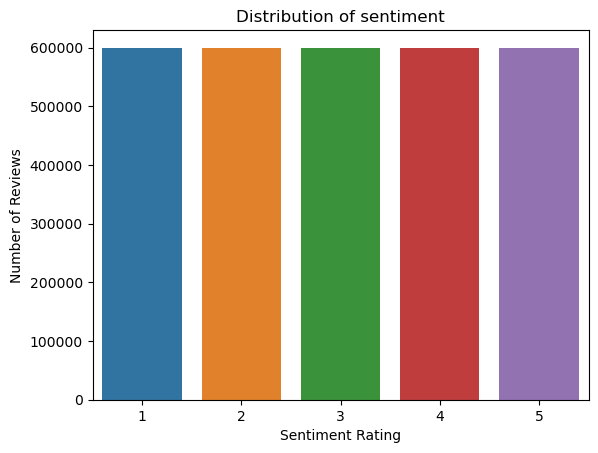

In [66]:
import seaborn as sns
plot = sns.countplot(x='Sentiment', data=product_review)
plot.set_title('Distribution of sentiment')
plot.set_xlabel('Sentiment Rating')
plot.set_ylabel('Number of Reviews')

In [4]:
print(product_review['Review'][10])

NameError: name 'product_review' is not defined

In [68]:
product_review = product_review.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
# product_review.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
product_review = product_review[product_review['Sentiment'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
product_review['Sentiment'] = np.where(product_review['Sentiment'] > 3, 1, 0)
product_review.head(5)

,Sentiment,ReviewTitle,Review
1806966,0,"Okay, but the Internet beats it","ten years ago, this would have been a 4 star b..."
2057850,0,breathkey review,if you like breathalyzers and you want one you...
640619,0,F-O-C-U-S !!!,I normally don't write reviews regarding movie...
1301303,0,Wrong Item,Very disappointing... Instead of model 6Y160M0...
2697773,0,Only useful if you are reading it while workin...,If you are looking for a general guide to DHTM...


In [69]:
# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(product_review['Review'], product_review['Sentiment'], \
                                                    test_size=0.2, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])

Load 192189 training examples and 48048 validation examples. 

Show a review in the training set : 
 this is probally one of the most stupid movies i have ever seen. the first one was actually good, this movie was so fake and stupid.


In [70]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words)) 

In [71]:
# Preprocess text data in training set and validation set
X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

C:\Users\MSI\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Show a cleaned review in the training set : 
 this is probally one of the most stupid movies i have ever seen the first one was actually good this movie was so fake and stupid


In [72]:
# Split review text into parsed sentences uisng NLTK's punkt tokenizer
# nltk.download()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):
    '''
    Parse text into sentences
    '''
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

192186 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['this', 'is', 'probally', 'one', 'of', 'the', 'most', 'stupid', 'movies', 'i', 'have', 'ever', 'seen', 'the', 'first', 'one', 'was', 'actually', 'good', 'this', 'movie', 'was', 'so', 'fake', 'and', 'stupid']


In [73]:
# Fit parsed sentences to Word2Vec model 
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, vector_size=num_features, min_count=min_word_count,
               window=context, sample=downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context")

print("Number of words in the vocabulary list : %d \n" % len(w2v.wv.index_to_key))  # 4016
print("Show first 10 words in the vocabulary list  vocabulary list: \n", w2v.wv.index_to_key[:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 27771 

Show first 10 words in the vocabulary list  vocabulary list: 
 ['the', 'i', 'and', 'a', 'to', 'it', 'of', 'this', 'is', 'in']


C:\Users\MSI\AppData\Local\Temp\ipykernel_1104\864508147.py:13: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v.init_sims(replace=True)


In [74]:
# Load trained Word2Vec model
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")

# Get Word2Vec embedding matrix
embedding_matrix = w2v.wv.vectors  # embedding matrix, type = numpy.ndarray
print("Shape of embedding matrix : ", embedding_matrix.shape)  # (4016, 300) = (vocabulary size, embedding dimension)

Shape of embedding matrix :  (27771, 300)


In [82]:
top_words = embedding_matrix.shape[0] #4016
maxlen = 100 
batch_size = 32
nb_classes = 2
nb_epoch = 3


# Vectorize X_train and X_test to 2D tensor
tokenizer_training = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer_training.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer_training.texts_to_sequences(X_train)
sequences_test = tokenizer_training.texts_to_sequences(X_test)

X_train_seq = pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape) #(27799, 100)
print('X_test shape:', X_test_seq.shape) #(3089, 100)
print('y_train shape:', y_train_seq.shape) #(27799, 2)
print('y_test shape:', y_test_seq.shape) #(3089, 2)

X_train shape: (192189, 100)
X_test shape: (48048, 100)
y_train shape: (192189, 2)
y_test shape: (48048, 2)


In [78]:
# Construct LSTM with Word2Vec embedding
model2 = Sequential()
model2.add(Embedding(top_words, 128))
model2.add(Dropout(0.2))
model2.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

# Compile model
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model evaluation
score = model2.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         3554688   
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 3,686,530
Trainable params: 3,686,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
6006/6006 [=======================

In [79]:
score = model2.evaluate(X_train_seq, y_train_seq, batch_size=batch_size)
print('Train loss : {:.4f}'.format(score[0]))
print('Train accuracy : {:.4f}'.format(score[1]))

6006/6006 [==============================] - 227s 38ms/step - loss: 0.1195 - accuracy: 0.9583
Train loss : 0.1195
Train accuracy : 0.9583


In [80]:
model2.save('LSTM_model_89.h5')

In [86]:
import pickle
# Save the trained tokenizer to a file
with open("tokenizer_training.pkl", "wb") as f:
    pickle.dump(tokenizer_training, f)

In [3]:
import pickle
import numpy as np
import tensorflow as tf
from keras.utils import pad_sequences
# Load the saved model
model_path = "LSTM_model_89.h5"
model = tf.keras.models.load_model(model_path)

# Load the saved tokenizer from file
with open("tokenizer_training.pkl", "rb") as f:
    load_tokenizer = pickle.load(f)

# Define a function to preprocess the input text
def preprocess_text(text, tokenizer, max_sequence_length):
        sequences = tokenizer.texts_to_sequences([text])
        padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
        return padded_sequences

# Preprocess the input text (customer review)
customer_review = "It didnt work as advertised"
tokenizer = load_tokenizer  # Replace this with your tokenizer used during training
max_sequence_length = 100  # Replace this with the max sequence length used during training
preprocessed_review = preprocess_text(customer_review, tokenizer, max_sequence_length)
# Make the prediction
prediction = model.predict(preprocessed_review)

# Interpret the prediction as a sentiment label
predicted_label_index = np.argmax(prediction)
sentiment_labels = ['Negative', 'Positive']  # Replace this with the actual labels used during training
predicted_label = sentiment_labels[predicted_label_index]

print(f"The sentiment of the review '{customer_review}' is {predicted_label}.")


1/1 [==============================] - 0s 310ms/step
The sentiment of the review 'It didnt work as advertised' is Negative.


In [4]:
!pip install gradio

     --------------------------------------- 17.4/17.4 MB 15.6 MB/s eta 0:00:00
     -------------------------------------- 124.7/124.7 kB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 19.7 MB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 195.0/195.0 kB 6.0 MB/s eta 0:00:00
     -------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00
     ------------------------------------- 288.1/288.1 kB 18.5 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 45.7/45.7 kB ? eta 0:00:00
     ------------------------------------- 477.4/477.4 kB 31.1 MB/s eta 0:00:00
     ----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [1]:
import gradio as gr
import tensorflow as tf
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your pre-trained model
model = tf.keras.models.load_model('LSTM_model_89.h5')

# Load your pre-trained tokenizer
with open('tokenizer_training.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Max length for padding sequences
max_len = 100  # adjust according to your training parameters

def sentiment_analysis(review):
    # Preprocess the text
    sequences = tokenizer.texts_to_sequences([review])
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    # Predict sentiment
    prediction = model.predict(padded_sequences)
    # Interpret the prediction as a sentiment label
    predicted_label_index = np.argmax(prediction)
    sentiment_labels = ['Negative', 'Positive']  # Replace this with the actual labels used during training
    predicted_label = sentiment_labels[predicted_label_index]
    return predicted_label

iface = gr.Interface(
    fn=sentiment_analysis, 
    inputs=gr.inputs.Textbox(lines=2, placeholder="Enter a review here..."), 
    outputs='text', title = 'Sentiment Analysis'
)

iface.launch()

C:\Users\MSI\anaconda3\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\MSI\anaconda3\lib\site-packages\gradio\inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
